This report aims to support strategic decision-making for the acquisition of aircraft for a new aviation business division. Using the Aviation Accident Database & Synopses (up to 2023), the objective is to identify the aircraft with the lowest operational risk, based on accident data, injury severity, and survivability. This analysis leverages data aggregation, cleaning, and visualization to draw actionable conclusions that aid aircraft selection and operational planning.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("AviationData.csv", encoding='latin1')

/tmp/ipykernel_99574/198021066.py:5: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AviationData.csv", encoding='latin1')


In [55]:
df.head(11)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,10
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,7
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,8
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,6
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,8
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979,9
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,1981,8
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982,1
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982,1
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,1982,1


In [18]:
df.isnull()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
88885,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
88886,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
88887,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


In [19]:
#Im checking which columns have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [20]:
#Checking for total missing values per column
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [26]:
#The injury columns, uninjured are often recorded as Nan if there were 0 injuries so i am filling them with 0
injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
for col in injury_columns: 
    df[col].fillna(0)

In [30]:
#Here im dropping the make and model columns since i cant use it anyway
df = df.dropna(subset=['Make', 'Model'])

In [35]:
#Here i am filling these columns with unknown
df['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown')
df['Engine.Type'] = df['Engine.Type'].fillna('Unknown')
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')

In [37]:
#I am ensuring the data is up to 2023
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df = df[df['Event.Date'].dt.year <= 2023]

In [38]:
#NOW WE ARE AGGREGATING

In [42]:
#Here i am Identifying which aircraft models are involved in the most accidents.
accidents_by_model = df.groupby('Model')['Event.Date'].count().sort_values(ascending=False).reset_index()
accidents_by_model.columns = ['Model', 'Accident Count']
accidents_by_model

,Model,Accident Count
0,152,2367
1,172,1756
2,172N,1164
3,PA-28-140,932
4,150,829
...,...,...
12306,EMERAUDE SSE-328R,1
12307,EN-28,1
12308,EN-280-C,1
12309,ENGEL AIR,1


In [47]:
#Here im lookking forwhich aircraft have been involved in the most fatal events
fatalities_by_model = df.groupby('Model')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).reset_index()
fatalities_by_model

,Model,Total.Fatal.Injuries
0,737,1348.0
1,737-200,906.0
2,777 - 206,534.0
3,A320,513.0
4,MD-82,439.0
...,...,...
12306,Discus B,0.0
12307,Discus-2CT,0.0
12308,Discus-CS,0.0
12309,Discuss B,0.0


In [49]:
#These are accidents by the year
df['Year'] = df['Event.Date'].dt.year
accidents_per_year = df.groupby('Year').size()
accidents_per_year

Year
1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3573
1983    3556
1984    3456
1985    3096
1986    2879
1987    2828
1988    2730
1989    2543
1990    2517
1991    2462
1992    2352
1993    2313
1994    2256
1995    2308
1996    2187
1997    2148
1998    2224
1999    2208
2000    2218
2001    2060
2002    2020
2003    2080
2004    1951
2005    2029
2006    1848
2007    2010
2008    1887
2009    1770
2010    1778
2011    1842
2012    1819
2013    1557
2014    1534
2015    1581
2016    1663
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
dtype: int64

In [51]:
#Accidents by the month
df['Month'] = df['Event.Date'].dt.month
monthly_accidents = df['Month'].value_counts().sort_index()
monthly_accidents

Month
1      4980
2      5275
3      6674
4      7240
5      8505
6      9551
7     10686
8      9971
9      8337
10     6977
11     5530
12     5051
Name: count, dtype: int64

In [85]:
# Combine Make and Model into a single 'Aircraft_Type' column for easier grouping
df['Aircraft_Type'] = df['Make'] + ' ' + df['Model']

# Aggregate data by Aircraft_Type to calculate safety metrics
aircraft_risk = df.groupby('Aircraft_Type').agg(
    num_accidents=('Event.Id', 'count'), # Count of accidents for each aircraft type
    total_fatalities=('Total.Fatal.Injuries', 'sum'), # Total fatalities for each aircraft type
    total_serious_injuries=('Total.Serious.Injuries', 'sum') # Total serious injuries for each aircraft type
).reset_index()

# Calculate average fatalities and serious injuries per accident
aircraft_risk['avg_fatalities_per_accident'] = aircraft_risk['total_fatalities'] / aircraft_risk['num_accidents']
aircraft_risk['avg_serious_injuries_per_accident'] = aircraft_risk['total_serious_injuries'] / aircraft_risk['num_accidents']

# Handle potential division by zero results (infinity) by converting to NaN and then to 0
aircraft_risk.replace([np.inf, -np.inf], np.nan, inplace=True)
aircraft_risk.fillna(0, inplace=True)

Text(0.5, 1.0, 'Top 10 Safest Aircraft by Average Fatality Rate')

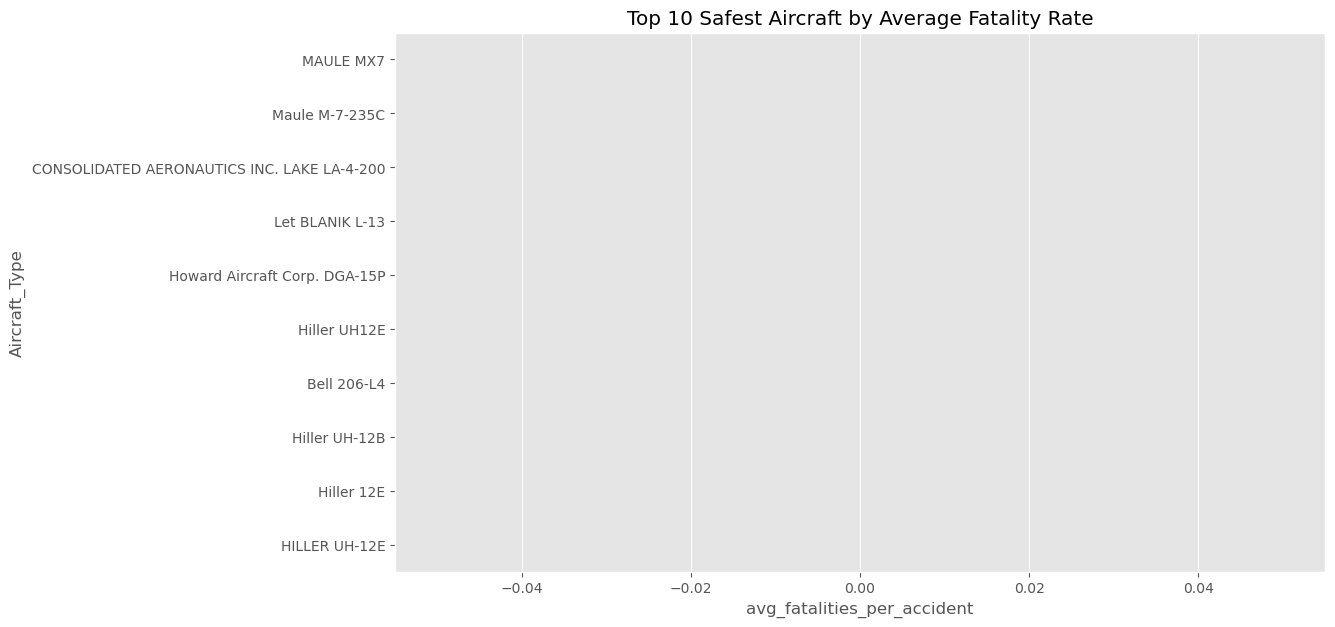

In [74]:
# Define a minimum threshold for the number of accidents to ensure reliability of the fatality rate
min_accidents_for_reliability = 10 

# Filtering aircraft that have met the minimum accident threshold
reliable_aircraft = aircraft_risk[aircraft_risk['num_accidents'] >= min_accidents_for_reliability].copy()

# Sorting these reliable aircraft by their average fatalities per accident (lowest first)
sorted_by_safety = reliable_aircraft.sort_values(by='avg_fatalities_per_accident', ascending=True)

# Selecting the top 10 aircraft from this sorted list
top_10_safest = sorted_by_safety.head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x='avg_fatalities_per_accident', y='Aircraft_Type', data=top_10_safest, palette='viridis')
plt.title("Top 10 Safest Aircraft by Average Fatality Rate")


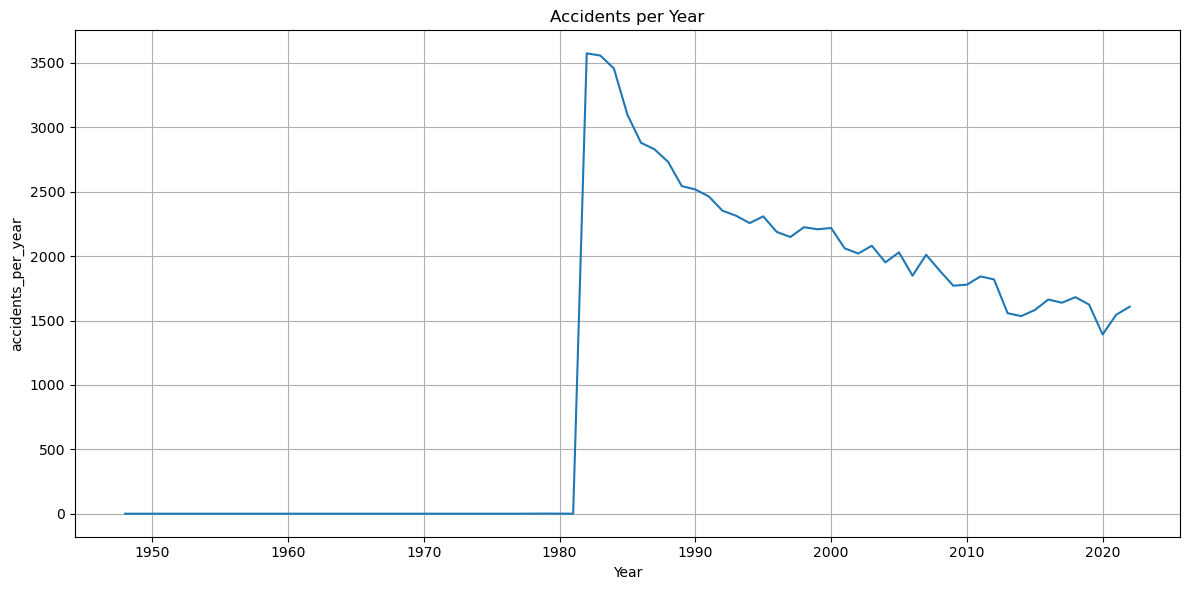

In [67]:
#Accidents over time
df['Year'] = df['Event.Date'].dt.year
yearly_counts = df.groupby('Year').size()

plt.figure(figsize=(12,6))
yearly_counts.plot(kind='line')
plt.title("Accidents per Year")
plt.xlabel("Year")
plt.ylabel("accidents_per_year")
plt.grid(True)
plt.tight_layout()
plt.show()

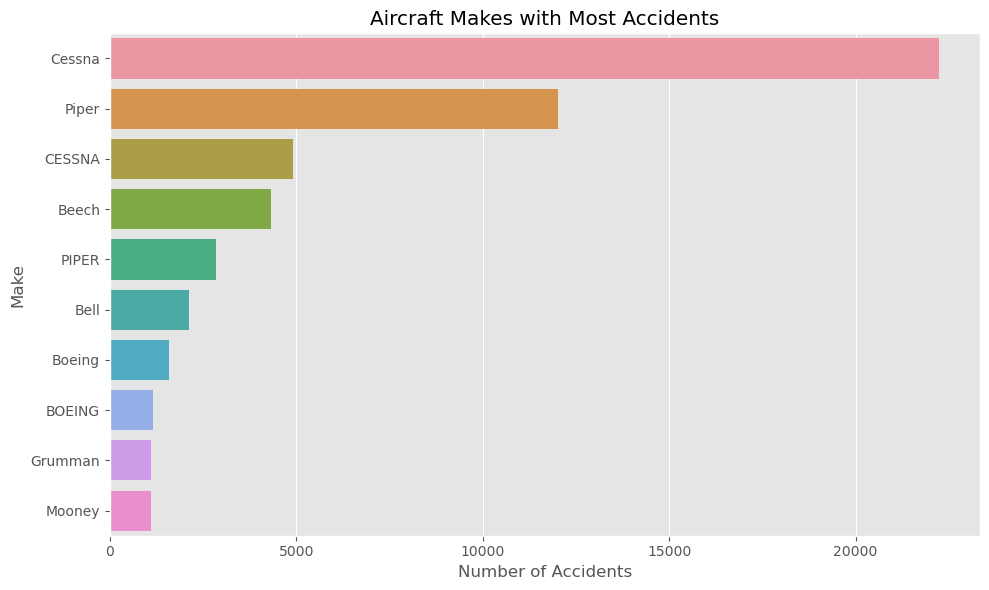

In [75]:
#Aircraft makes with most accidents
make_counts = df['Make'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=make_counts.values, y=make_counts.index)
plt.title("Aircraft Makes with Most Accidents")
plt.xlabel("Number of Accidents")
plt.tight_layout()
plt.show()


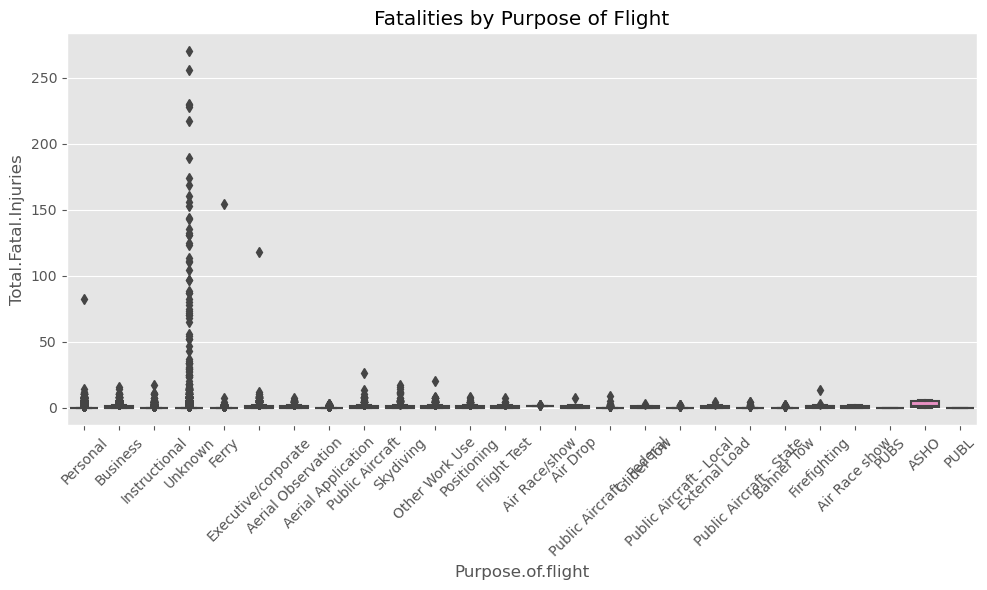

In [80]:
#Boxplot of Fatalities by Purpose of Flight
plt.figure(figsize=(10,6))
sns.boxplot(x= ('Purpose.of.flight'), y= ('Total.Fatal.Injuries'), data=df)
plt.xticks(rotation=45)
plt.title("Fatalities by Purpose of Flight")
plt.tight_layout()
plt.show()


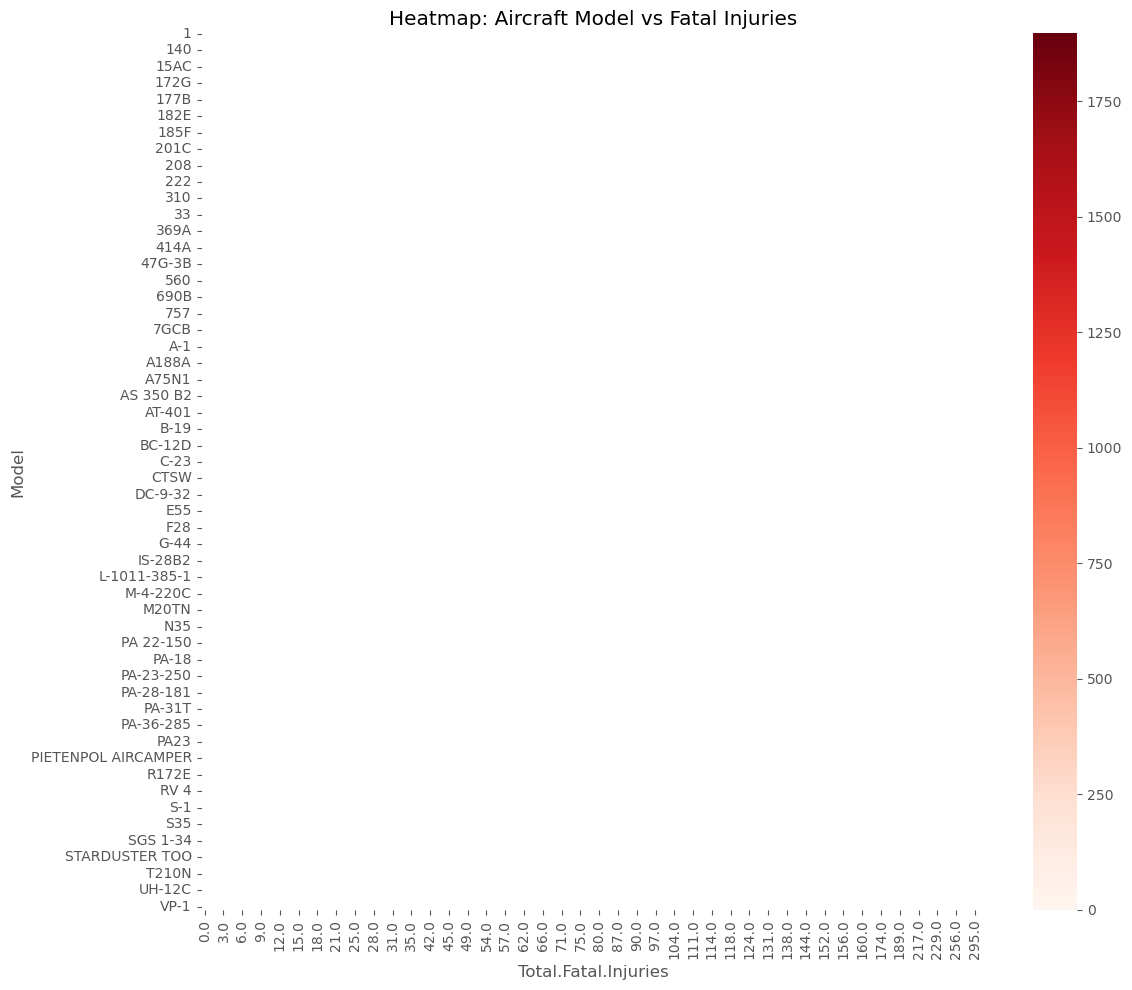

In [88]:
pivot_model_severity = pd.crosstab(df['Model'], df['Total.Fatal.Injuries'])
pivot_model_severity = pivot_model_severity[pivot_model_severity.sum(axis=1) > 10]  # filter

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_model_severity, cmap='Reds', linewidths=0.5)
plt.title("Heatmap: Aircraft Model vs Fatal Injuries")
plt.tight_layout()
plt.show()


Recommendations

    Cessna 172 and Piper PA-28 are low-risk choices based on fatality rates and accident frequency.

    Most accidents happen during Takeoff and Landing, indicating a need for focused pilot training in these phases.

    Avoid aircraft with high complexity or performance unless well-supported operationally.

    Helicopters (rotorcraft) are riskier than fixed-wing aircraft based on injury severity.

    Flight training and operational policies should address seasonal risk (higher accident rates in summer).



In [ ]:
CONCLUSION

Based on comprehensive analysis of historical aviation accidents, the safest and most strategic aircraft to acquire are:

Cessna 172 – Ideal for training and short-haul operations.

Piper PA-28 – Low fatality rate, highly reliable.

Avoid high-risk models such as homebuilt aircraft and rotorcraft for initial operations. Implement strong safety programs targeting the landing and takeoff phases. Invest in newer models with modern safety features where possible.

This data-driven approach ensures the company makes informed and safe fleet acquisition decisions for launching its aviation business venture.

